## Importación de librerías

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge

Dado el dataset cargado a continuación sobre ventas de videojuegos(https://www.kaggle.com/gregorut/videogamesales/data), el challenge consiste en resolver las siguientes consignas:

In [5]:
data = pd.read_csv('./vgsales.csv')
data.shape

(16598, 11)

In [6]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
data.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15436,15439,Painkiller: Hell & Damnation,X360,2013.0,Shooter,Nordic Games,0.00,0.01,0.00,0.00,0.02
3479,3481,Contra: Shattered Soldier,PS2,2002.0,Shooter,Konami Digital Entertainment,0.28,0.22,0.00,0.07,0.58
7608,7610,Injustice: Gods Among Us,WiiU,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.10,0.08,0.00,0.02,0.20
14017,14019,Hakuouki: Zuisouroku,PS2,2009.0,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
11537,11539,Sengoku Musou 3: Moushouden,Wii,2011.0,Action,Ackkstudios,0.00,0.00,0.08,0.00,0.08


Crear una **función** que tenga como entrada el dataset o el conjunto de columnas y que realice lo siguiente:
- Verificar qué tipo de datos contiene el dataset o las columnas ingresadas y en base a eso seleccionar un gráfico pertinente como subplots dentro de una figura (por ejemplo: gráfico de barras para columnas categóricas, histogramas o boxplots para columnas numéricas,etc).
- Generar la grilla de suplots automáticamente (usando un for).
- Si la cantidad de variables categóricas es muy grande (por ejemplo más de 50 categorías) seleccionar el porcentaje de categorías más representativo y plotearlo de manera adecuada.
- Si la cantidad de texto de las variables categóricas es demasiado largo cortar todos los textos en cierto número de caracter.
- Agregar: 
    - Títulos en cada uno de los subplots con la variable que se está representando.
    - Título general en el gráfico principal.
    - Etiquetas, rotación en los ejes y leyendas en caso que sea neecsario.
    - Probar colores.
- Si las variables numéricas poseen muchos valores atipicos, eliminar los mismos usando los valores de los quantiles.

**La función debe ser lo más general y parametrizada posible**, por lo tanto se deben agregar tantas entradas como parametros a configurar sean necesarios, y la salida debe tener una forma similar a la siguiente imagen: 

In [8]:
def visualizacion(data, q = (0,1), grid_col = 3, str_len = None, len_cat_ext = 20):
    """Plotea una grilla con gráficos de cada variable del dataframe recibido. Trabajo solo con datos de tipo "object" o "number".
     Parámetros:
       * data 
           - Dataframe del cual se plotearan las columnas.
       * q = (0,1) 
           - Rango intercuantílico a filtrar para el ploteo. Se aplica a variables numericas
           - Valor por defecto: (0,1). Toma todo el rango intercuantílico(no se elimina ningun dato).
       * grid_col = 3
           - Cantidad de columnas de la grilla. La cantidad de filas se acomoda automaticamente segun la cantidad de columnas definidas.
           - Valor por defecto: 3.
       * str_len = None 
           - Largo de texto a considerar para variables categoricas. 
           - Valor por defecto: None. Se toma todo el texto.
       * len_cat_ext = 20
           - Cantidad de categorias a dibujar en caso de que superen las 30 categorias. 
           - Valor por defecto: 20.
       """
    
    values = data.columns
    filas = values.nunique()//grid_col + 1
    grilla = (filas,grid_col)


    numeric_columns = data.select_dtypes(include='number').columns
    categ_columns = data.select_dtypes(include='object').columns
    
    plt.figure(figsize=(20,(6*values.nunique()/grid_col)))
    plt.subplots_adjust(hspace=0.3)


    plt.suptitle('Visualización de Variables',y = (1.02),fontsize=25)


    for i,j in enumerate(data.columns):
        plt.subplot2grid( grilla,(i//grid_col,i%grid_col)) 
        if j in categ_columns:
            k =  data[j].nunique()/len(data)*100
            if ((k > 10) | (data[j].nunique()>40)):
                plt.title(j + ' - Las primeras '+str(len_cat_ext)+' categorías con más registros')
                sns.barplot(y = data[j].value_counts().head(len_cat_ext).index.str[0:str_len], x= data[j].value_counts().head(len_cat_ext).values, orient='h')
                plt.xlabel( 'Variable categorica con demasiados valores unicos. \nTiene ' + str(data[j].nunique()) + ' valores diferentes en un total de ' + str(len(data)) + ' filas.')
            else:
                plt.title(j)
                sns.barplot(x = data[j].value_counts().index.str[0:str_len], y= data[j].value_counts().values)
                plt.xlabel('')
                plt.tick_params(axis='x',rotation=90)
        if j in numeric_columns:
            plt.title(j)
            df = data[(data[j]>=data[j].quantile(q[0])) & (data[j]<=data[j].quantile(q[1]))]
            sns.distplot(df[j].dropna(), axlabel = False)
    plt.tight_layout()
    plt.show()

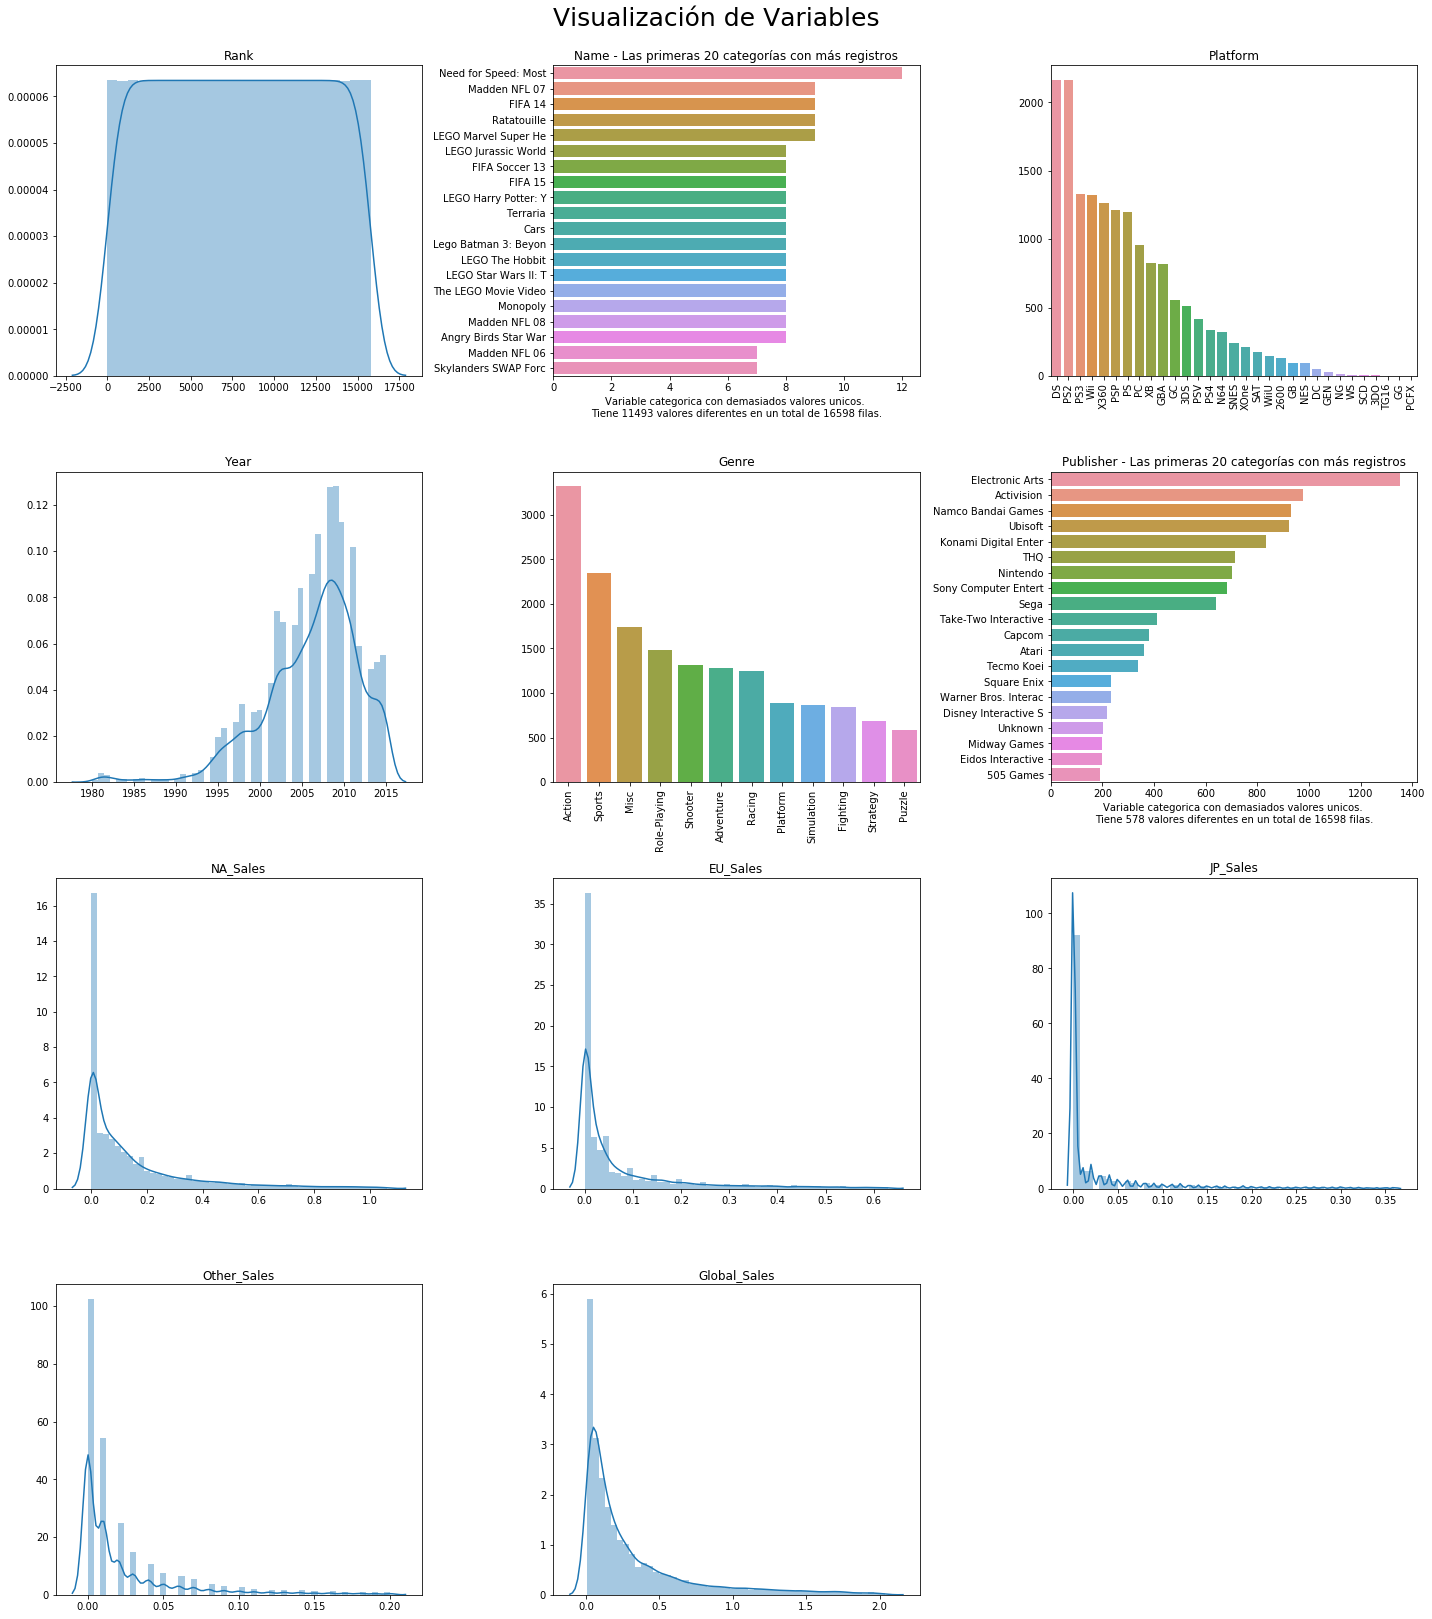

In [12]:
visualizacion(data,grid_col=3 ,q=(0,0.95), str_len = 20)

In [10]:
help(visualizacion)

Help on function visualizacion in module __main__:

visualizacion(data, q=(0, 1), grid_col=3, str_len=None, len_cat_ext=20)
    Plotea una grilla con gráficos de cada variable del dataframe recibido. Trabajo solo con datos de tipo "object" o "number".
    Parámetros:
      * data 
          - Dataframe del cual se plotearan las columnas.
      * q = (0,1) 
          - Rango intercuantílico a filtrar para el ploteo. Se aplica a variables numericas
          - Valor por defecto: (0,1). Toma todo el rango intercuantílico(no se elimina ningun dato).
      * grid_col = 3
          - Cantidad de columnas de la grilla. La cantidad de filas se acomoda automaticamente segun la cantidad de columnas definidas.
          - Valor por defecto: 3.
      * str_len = None 
          - Largo de texto a considerar para variables categoricas. 
          - Valor por defecto: None. Se toma todo el texto.
      * len_cat_ext = 20
          - Cantidad de categorias a dibujar en caso de que superen las 30 cate

## Evaluación

El challenge se evaluará de la siguiente forma, donde mientras más alto el nivel más completo el challenge.

- **Level0:** Hacer los gráficos por separado por tipo de variable agregando la siguiente información: 
    - a: Ejes con título.
    - b: Subtítulos y títulos.
    - c: Rotación en los ejes si hace falta.
    - d: Leyendas.
    - e: Colores.
    - f: Tamaño de letra.
- **Level1:** Plotear en una grilla todas las variables.
- **Level2:** Plotear en una grilla de todas las variables con grilla generada dinamicamente (usando un for).
- **Level3:** Generar todo lo anterior en una función.
- **Level4:** Agregar diseño, marcas en los ejes, títulos, formas.
- **Level5:**
    - Remover valores atipicos de variables numéricas. 
    - Remover categoricas minoritarias (o seleccionar las mayoritarias o más representativas).
- **Level6:** Documentar el código.